Import Necessary Libraries

In [17]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

A Checkboard Pattern Is Defined Whcih Will Be Used For Calliberation

In [18]:
CHECKERBOARD=(6,9)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,0.001)

Create 2 Vectors To Store The 3D and Corresponding 2D Points Based On The Generated Checkboard 

In [19]:
objpoints=[]
imgpoints=[]

Defining The Real Coordinates For 3D Points

In [20]:
objp=np.zeros((1,CHECKERBOARD[0]*CHECKERBOARD[1],3),np.float32)
objp[0,:,:2]=np.mgrid[0:CHECKERBOARD[0],0:CHECKERBOARD[1]].T.reshape(-1,2)
prev_img_shape=None

Extracting Path Of Individual Image Stored In A Given Directory

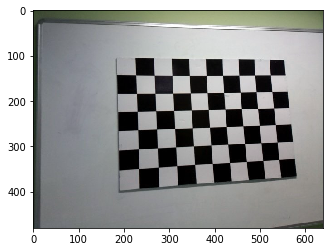

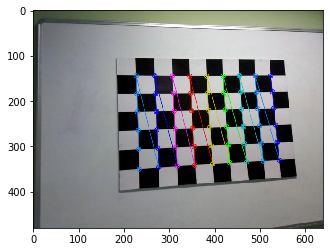

Camera matrix : 

[[470.61310964   0.         259.66101109]
 [  0.         456.3324331  218.11491544]
 [  0.           0.           1.        ]]
dist : 

[[ 0.15137608 -0.04138173 -0.00479209 -0.01573293 -0.10203242]]
rvecs : 

[array([[-0.21970763],
       [-0.04970311],
       [ 1.53437877]])]
tvecs : 

[array([[ 7.10519167],
       [-2.01711963],
       [12.83532318]])]


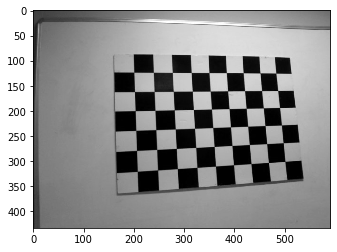

Total Error: 0.018820535998448195


In [21]:
images=glob.glob(r'C:\Users\DEBANSHU BANERJEE\Desktop\Chessboard DIC\*.jpg')
for fname in images:
    img=cv2.imread(fname)
    plt.imshow(img)
    plt.show()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret=true
    ret,corners=cv2.findChessboardCorners(gray,CHECKERBOARD,cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    # If desired number of corner are detected,we refine the pixel coordinates and displaythem on the images of checker board
    if ret==True:
        objpoints.append(objp)
        # Refining pixel coordinates for given 2d points
        corners2=cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        img=cv2.drawChessboardCorners(img,CHECKERBOARD,corners2,ret)
    plt.imshow(img)
    plt.show()
    # Performing camera calibration by passing the value of known 3D points (ojpoints) and corresponding pixel coordinates of the detected corners (imgpoints)
    ret,mtx,dist,rvecs,tvecs=cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)
    print("Camera matrix : \n")
    print(mtx)
    print("dist : \n")
    print(dist)
    print("rvecs : \n")
    print(rvecs)
    print("tvecs : \n")
    print(tvecs)
    # Now, we can take an image and undistort it
    h,w=img.shape[:2]
    newcameramtx,roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    dst=cv2.undistort(gray,mtx,dist,None,newcameramtx)
    # crop the image
    x,y,w,h=roi
    dst=dst[y:y+h,x:x+w]
    plt.imshow(dst,'gray')
    plt.show()
    # Re-projection error gives a good estimation of just how exact the found parameters are. The closer the re-projection error is to zero, the more accurate the parameters we found are
    mean_error=0
    for i in range(len(objpoints)):
        imgpoints2,_=cv2.projectPoints(objpoints[i],rvecs[i],tvecs[i],mtx,dist)
        error=cv2.norm(imgpoints[i],imgpoints2,cv2.NORM_L2)/len(imgpoints2)
        mean_error+=error
    print("Total Error: {}".format(mean_error/len(objpoints)))